In [1]:
# %matplotlib inlineb
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd

一个用500hPa风场，配合proplot进行py的矢量图绘制的试验脚本

In [2]:
dir_in = "/raid52/yycheng/MPAS/VR_postprocess/VR_merge/ke_daily_vi/"
vr = xr.open_dataset(dir_in + "1998_VR_ke_daily_vi.nc")

In [3]:
u = vr['uReconstructZonal']
v = vr['uReconstructMeridional']

In [4]:
u_plot = u.sel(plevels=500).mean("Time")
v_plot = v.sel(plevels=500).mean("Time")

In [67]:
wind_plot = np.sqrt(u_plot**2 + v_plot**2)

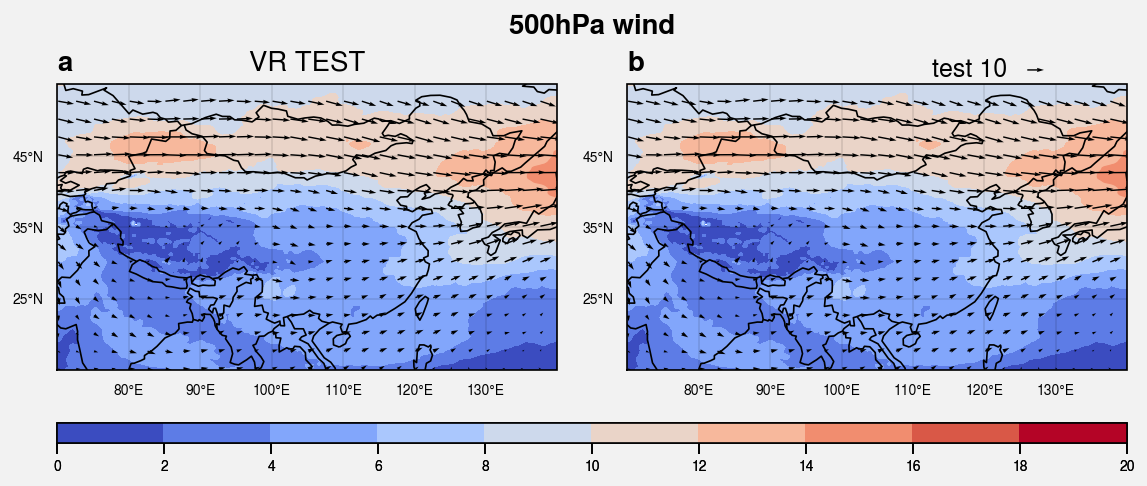

In [94]:
# import proplot as plot
from matplotlib import pyplot as plt
import proplot as plot

cmap = "coolwarm"
# ----- get filter vars coords-----

cticks = np.arange(0,22,2)
lon = u_plot.longitude.values
lat = u_plot.latitude.values

#----- create plot -----
fig, axs = plot.subplots(ncols=2,nrows=1, proj=('cyl'))

#-----2012-----
axs[0].format(title='VR TEST')
m_contour= axs[0].contourf(lon, lat, wind_plot, levels = cticks, cmap=cmap)
m_quiver = axs[0].quiver(lon[::10], lat[::10], u_plot[::10,::10], v_plot[::10,::10],scale = 300.)
m_contour= axs[1].contourf(lon, lat, wind_plot, levels = cticks, cmap=cmap)
m_quiver = axs[1].quiver(lon[::10], lat[::10], u_plot[::10,::10], v_plot[::10,::10],scale = 300.)
axs[0].quiverkey(m_quiver, 0.8, 1.05, label="test 10", U=10, labelpos="W")

fig.colorbar(m_contour, cmap=cmap,loc='b', width=0.1,ticklabelsize=5,ticks=cticks)
# format作为整个proplot集中对属性进行修改的method
axs.format(
abc=True,
lonlim=(70, 140), latlim=(15, 55), coast=True,
#-----GEO axis-----
borders = True,
labels = True,
gridlabelsize = 5,
gridminor = False,

longrid  = True,
latgrid  = True,
# latlines = 10,
# lonlines = 10,
lonlocator = np.arange(70,150,10),
latlocator = np.arange(15,65,10),
lonminorlocator = np.arange(70,140+2,2),
latminorlocator = np.arange(15,55+2,2),
#-----line label-----
# linewidth = 0.5,
suptitle="500hPa wind",
)
# #----- add contour tick labels -----
# # axs.clabel(m, inline=True, fontsize=5, colors = 'k', fmt='%4.0f',use_clabeltext=True, inline_spacing=0)
# fig.colorbar(m_contour, loc='b', cmap=cmap, width=0.1)

# fig.patch.set_facecolor('white')
# plt.savefig('./output_pic/precip_spatial.png', dpi=300, facecolor= "white")